In [121]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

df = pd.read_csv("collegebyregion.csv",dtype=str)
#df.columns
df.head()
#df["Starting Median Salary"]
#df.dtypes

#plt.plot(df["School Name"],df["Starting Median Salary"])


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",N/A,"$104,000.00","$161,000.00",N/A
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",N/A,"$96,000.00","$180,000.00",N/A
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",N/A,"$54,800.00","$157,000.00",N/A


In [122]:
#Exploring the dataset

df.columns

Index(['School Name', 'Region', 'Starting Median Salary',
       'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'],
      dtype='object')

Ok so this is a good first try, gotta parse it down a little 

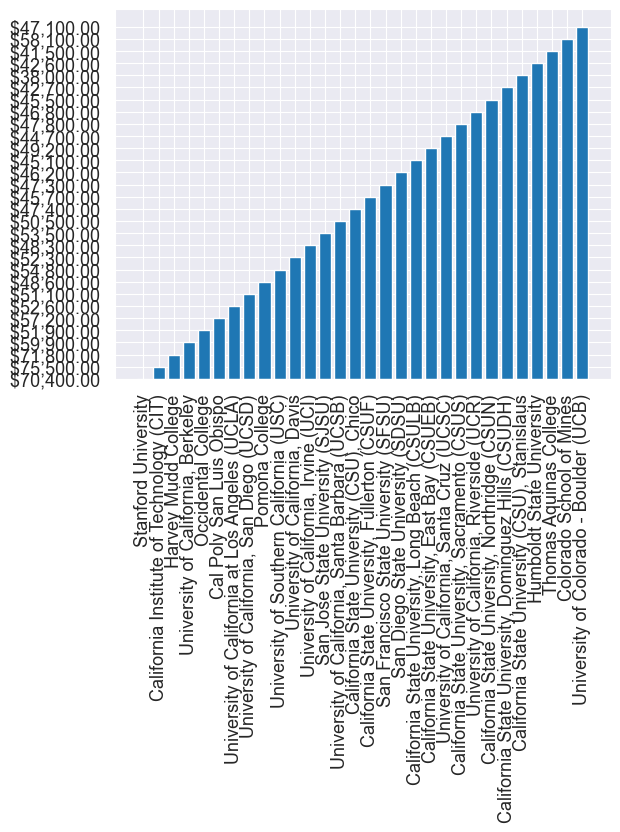

In [123]:
splitDF = df.head(30)
plt.bar(splitDF["School Name"],splitDF["Starting Median Salary"])
plt.xticks(rotation='vertical')
plt.show()

The chart is displaying like this because the salary values are sting types, I have to change it so the plot understands what these values mean. I will double check below 

Cleaning Data to readable types 

In [124]:
str_columns = ["School Name","Region"]

df.replace("N/A\xa0",0,inplace=True)

df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",0,"$104,000.00","$161,000.00",0
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",0,"$96,000.00","$180,000.00",0
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",0,"$54,800.00","$157,000.00",0


In [125]:

for column in df.columns: 
    if column not in str_columns: 
        print(column)
        df[column] = df[column].replace('[^\d.]', '', regex=True).astype(float)
    else:
        df[column] = df[column].str.strip()

df.head()


Starting Median Salary
Mid-Career Median Salary
Mid-Career 10th Percentile Salary
Mid-Career 25th Percentile Salary
Mid-Career 75th Percentile Salary
Mid-Career 90th Percentile Salary


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,0.0,104000.0,161000.0,0.0
2,Harvey Mudd College,California,71800.0,122000.0,0.0,96000.0,180000.0,0.0
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,0.0,54800.0,157000.0,0.0


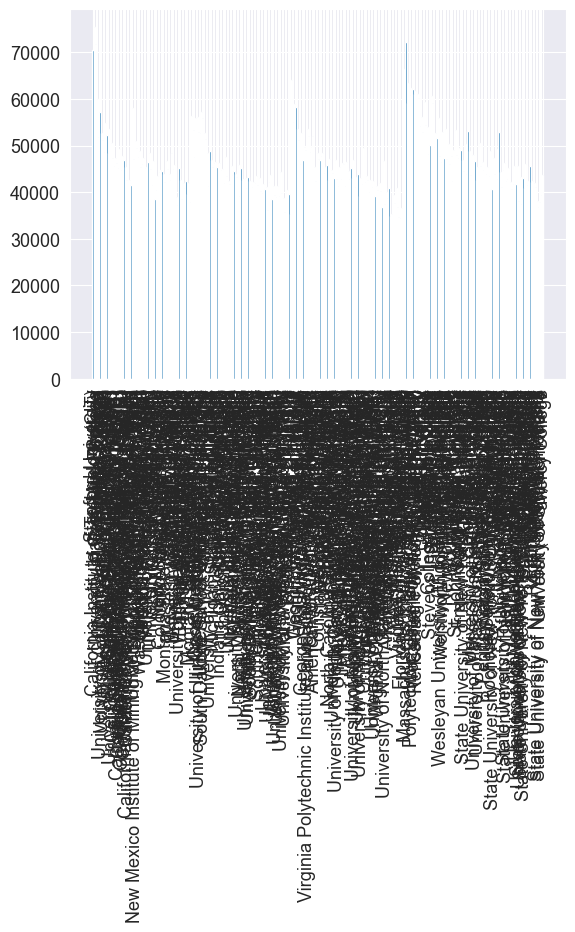

In [126]:


df["Starting Median Salary"].head()
plt.bar(df["School Name"],df["Starting Median Salary"])
plt.xticks(rotation='vertical')
plt.show()

OK so from this, There are a few to-dos now: 
1. Split dataframe into sections
    1. School type? (not the focus of this but still gonna split)
    2. Region? 
2. Graph each one of them with the data 
    1. Heat Map 
    2. Bar Plot 
    3. Scatter?? (not really needed but could be cool visuals for clustering)
3. Find summary statistics
4. Graph those summary statistics against eachother for further observation, maybe a line chart
    

Split Into Sections 

In [127]:
unique_entries_list = df['Region'].unique().tolist()
print(unique_entries_list)

df_Western = df[df['Region'] == 'Western']
df_California = df[df['Region'] == 'California']
df_Midwestern = df[df['Region'] == 'Midwestern']
df_Southern = df[df['Region'] == 'Southern']
df_Northeastern = df[df['Region'] == 'Northeastern']

print(df.shape)
print(df_Western.shape) 
print(df_California.shape)
print(df_Midwestern.shape)
print(df_Southern.shape)
print(df_Northeastern.shape)


['California', 'Western', 'Midwestern', 'Southern', 'Northeastern']
(320, 8)
(42, 8)
(28, 8)
(71, 8)
(79, 8)
(100, 8)


In [128]:
#California has some more specifics 

ucList = [col for col in df["School Name"] if 'University of California' in col]
print(ucList)

stateList = [col for col in df["School Name"] if 'California State University' in col]
print(stateList)

# ok there are lots of areas so, lets do a looping thing




['University of California, Berkeley', 'University of California at Los Angeles (UCLA)', 'University of California, San Diego (UCSD)', 'University of California, Davis', 'University of California, Irvine (UCI)', 'University of California, Santa Barbara (UCSB)', 'University of California, Santa Cruz (UCSC)', 'University of California, Riverside (UCR)']
['California State University (CSU), Chico', 'California State University, Fullerton (CSUF)', 'California State University, Long Beach (CSULB)', 'California State University, East Bay (CSUEB)', 'California State University, Sacramento (CSUS)', 'California State University, Northridge (CSUN)', 'California State University, Dominguez Hills (CSUDH)', 'California State University (CSU), Stanislaus']


Graphing: region & school type 

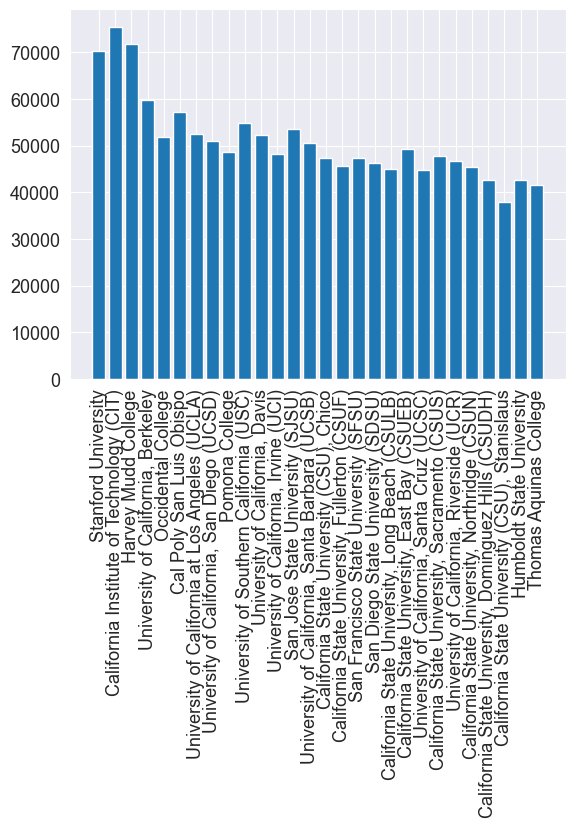

In [129]:
df_California["Starting Median Salary"].head()
plt.bar(df_California["School Name"],df_California["Starting Median Salary"])
plt.xticks(rotation='vertical')
plt.show()

Summary Statistics

Combined Statistics 

Combined Graphs